In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Consumo_cerveja.csv", decimal=",")
data.info()

# Display the statistical summary of the dataset
data.describe()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [75]:
data['Consumo de cerveja (litros)'] = pd.to_numeric(data['Consumo de cerveja (litros)'], errors='coerce')

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [76]:

data.dropna(inplace=True)
X = data.drop(columns=["Consumo de cerveja (litros)", "Data"])
y = data["Consumo de cerveja (litros)"]

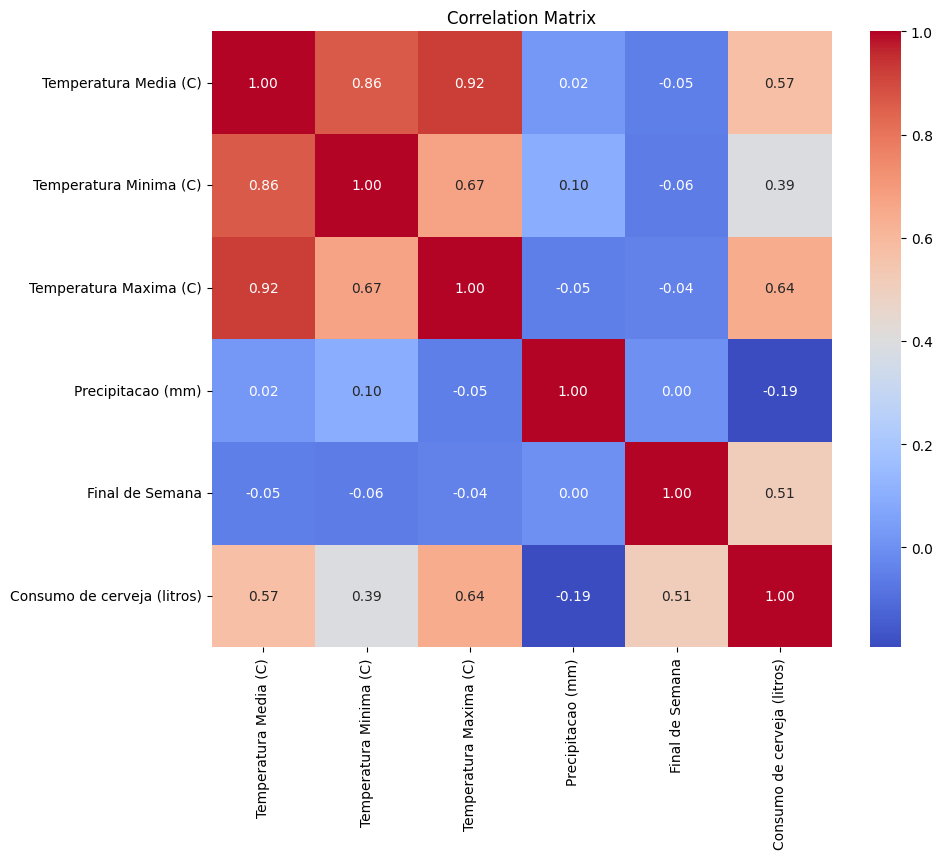

In [77]:
numeric_columns = data.select_dtypes(include=np.number)

correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
models_before = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for model_name, model in models_before.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    print(f"Model: {model_name}")
    print(f"Cross-validated MSE: {-cv_scores.mean()}")
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}\n")


Model: Linear Regression
Cross-validated MSE: 5.613537979661727
MSE: 5.699451793236823

Model: Ridge Regression
Cross-validated MSE: 5.617408272038218
MSE: 5.707114253115597

Model: Lasso Regression
Cross-validated MSE: 10.88069346032795
MSE: 13.083878187877238

Model: Decision Tree
Cross-validated MSE: 12.058836609701926
MSE: 11.469135356164383

Model: Random Forest
Cross-validated MSE: 7.09296903195866
MSE: 7.335315253810946



In [80]:
X_train["Temperature_Range"] = X_train["Temperatura Maxima (C)"] - X_train["Temperatura Minima (C)"]
X_test["Temperature_Range"] = X_test["Temperatura Maxima (C)"] - X_test["Temperatura Minima (C)"]
print(X_train)


     Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
211                  19.24                    12.8                    26.6   
340                  20.04                    18.0                    23.9   
202                  14.52                    12.8                    16.1   
75                   21.92                    18.6                    25.6   
84                   22.98                    18.3                    29.8   
..                     ...                     ...                     ...   
71                   22.34                    20.0                    26.6   
106                  21.42                    18.4                    27.0   
270                  21.22                    17.5                    23.6   
348                  25.66                    20.6                    32.8   
102                  20.88                    18.1                    25.7   

     Precipitacao (mm)  Final de Semana  Temperature_Range  
21

In [81]:
#With added feature
models_after = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
for model_name, model in models_after.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    print(f"Model: {model_name}")
    print(f"Cross-validated MSE: {-cv_scores.mean()}")
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}\n")


Model: Linear Regression
Cross-validated MSE: 5.613537979661728
MSE: 5.699451793236821

Model: Ridge Regression
Cross-validated MSE: 5.617433590181351
MSE: 5.707316915254571

Model: Lasso Regression
Cross-validated MSE: 10.883340758228297
MSE: 13.083878344249705

Model: Decision Tree
Cross-validated MSE: 12.340224304617182
MSE: 15.891803493150688

Model: Random Forest
Cross-validated MSE: 6.8548532722273325
MSE: 7.514628187513689



In [82]:
#With only high correlations
X = data.drop(columns=['Data', 'Precipitacao (mm)', 'Temperatura Minima (C)', 'Consumo de cerveja (litros)'])
y = data['Consumo de cerveja (litros)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Print cross-validated MSE
    print(f"Cross-validated MSE for {model_name}: {-cv_scores.mean()}")
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {model_name}: {mse}\n")


Cross-validated MSE for Linear Regression: 5.741291767312914
MSE for Linear Regression: 6.8990851827143915

Cross-validated MSE for Ridge Regression: 5.742088738298685
MSE for Ridge Regression: 6.899025436945979

Cross-validated MSE for Lasso Regression: 10.90089148451101
MSE for Lasso Regression: 14.021036121083872

Cross-validated MSE for Decision Tree: 11.59978553027469
MSE for Decision Tree: 14.21157806849315

Cross-validated MSE for Random Forest: 7.189770961217624
MSE for Random Forest: 9.088189412131365

